# Load dataset + Explore data distributions

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0], na_values=["NA"])
df.head()

Saving HousingData.csv to HousingData (5).csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [61]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


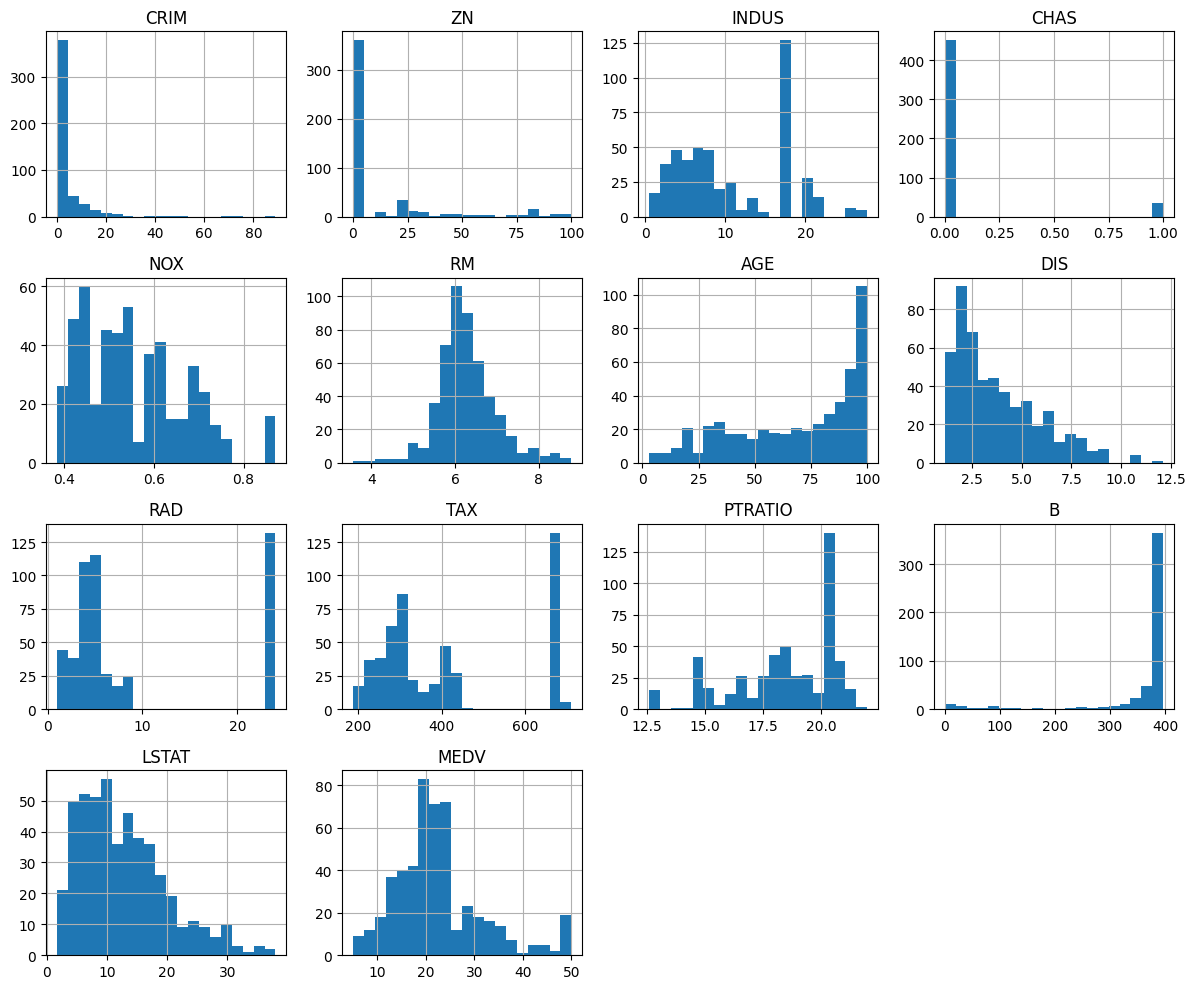

In [62]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

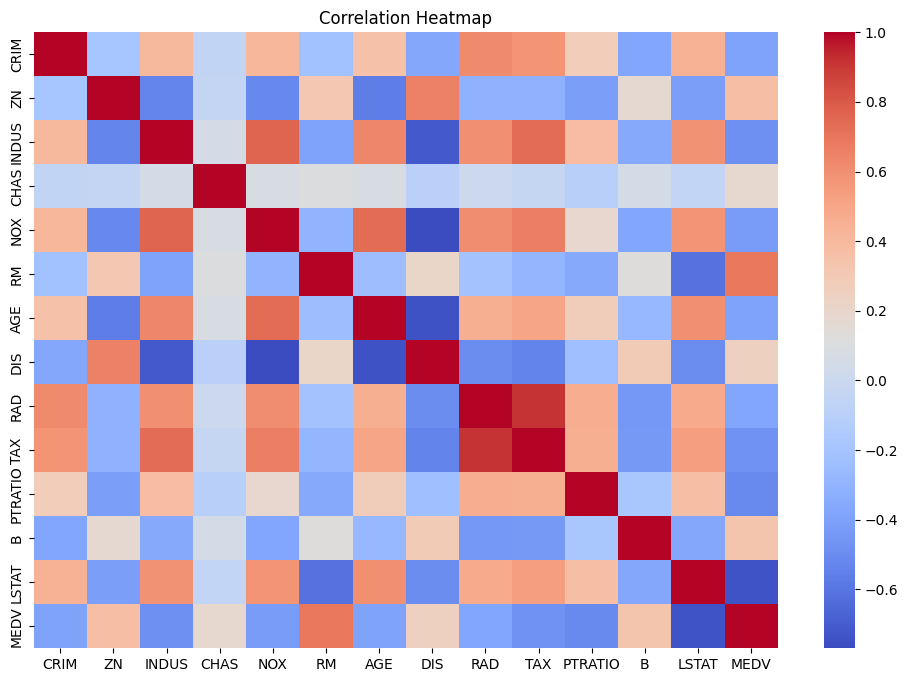

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Handle missing data + Preprocess inputs

In [64]:
df = df.fillna(df.median(numeric_only=True))

In [65]:
from scipy import stats

z = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z < 3).all(axis=1)]

In [66]:
skewed_cols = ["CRIM", "LSTAT", "TAX"]

for col in skewed_cols:
    df[col] = np.log1p(df[col])

In [67]:
df = df.drop(columns=["AGE", "RAD", "INDUS", "B"])

In [68]:
from sklearn.preprocessing import StandardScaler

X = df.drop("MEDV", axis=1)
y = df["MEDV"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train regression model (Linear Regression)

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate predictions using Mean Squared Error

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R2:", r2)

Linear Regression MSE: 22.2234259535723
Linear Regression R2: 0.6521363998034418


In [72]:
final_features = X.columns.tolist()
print(final_features)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']


In [73]:
import numpy as np
import pandas as pd

def predict_custom(data_dict):
    df_input = pd.DataFrame([data_dict], columns=final_features)
    for col in ["CRIM", "LSTAT", "TAX"]:
        if col in df_input.columns:
            df_input[col] = np.log1p(df_input[col])
    df_scaled = scaler.transform(df_input)
    pred = model.predict(df_scaled)[0]
    return pred

In [74]:
sample_house = {
    "CRIM": 0.1,
    "ZN": 20,
    "CHAS": 0,
    "NOX": 0.5,
    "RM": 6.2,
    "DIS": 4.0,
    "TAX": 300,
    "PTRATIO": 15,
    "LSTAT": 10
}

print("Predicted Price:", predict_custom(sample_house))

Predicted Price: 25.580813934401217
